In [1]:
from integrate import integral
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
from PartDist import ExpCutOffPL
from PartDist import PowerLaw
from grid import grid

In [ ]:
def SynchEm(part_dist,E,Egam,B):
    """
    Essa função calcula a emissão síncrotron dada uma distribuição de partículas, um array de energia dos elétrons e dos fótons e um campo magnético

    Parâmetros:

    part_dist[function]: função da distribuição de partículas

    E [np.ndarray]: array com os valores da energia dos elétrons

    Egam [np.ndarray]: array com os valores da energia dos fótons

    B [float]: valor do campo magnético

    Return:

    L [np.ndarray]: array da luminosidade síncrotron produzida

    """

    #checando se entradas estão corretas:

    if not callable (part_dist,function):
        raise TypeError (f"part_dist deve ser uma função, mas recebeu {type(part_dist).__name__}")
    if not isinstance (E,np.ndarray):
        raise TypeError (f"E deve ser um numpy.ndarray, mas recebeu {type(part_dist).__name__}")
    if not isinstance (Egam,np.ndarray):
        raise TypeError (f"Egam deve ser um numpy.ndarray, mas recebeu {type(part_dist).__name__}")
    if not isinstance (B,(int,float)):
        raise TypeError (f"E deve ser um int ou float, mas recebeu {type(part_dist).__name__}")

    #definindo constantes em cgs
    e = 4.8032e-10  #carga do elétron
    me = 9.1094e-28 #massa do elétron
    h = 6.6261e-27  #constante de planck
    c = 2.9979e10  #velocidade de luz

    #cálculo do termo fora da integral
    factor1 = 1.85*np.sqrt(2)*e**3*B
    factor2 = h*me*c**2
    
    #calculando a integral
    #definindo limites da integral
    Emin, Emax = E[0], E[-1]
    #definindo função que será integrada
    Lgam = np.zeros_like(Egam)
    for i in range(len(Egam)):
        def integ(epsilon):
            #cálculando energia crítica
            Ec = (3 * e * h * np.sqrt(2/3) * B * epsilon**2) / (4 * np.pi * me**3 * c**5)
            return part_dist(epsilon)*(Egam[i]/Ec)**(1/3)*np.exp(-Egam[i]/Ec)    
        Integral_val,error = integral(Emin,Emax,integ)
        Lgam[i] = factor1/factor2*Integral_val
    return Lgam

In [227]:
particles = PowerLaw(1.,7/3)
#criando grid the energia
ev_erg = 1.6*10**(-12) #erg
E = grid(1.e3,1.e12,1000)
Egam = grid(1e-5,1e10,10000) #eV
#eV
Egam [0] = 1000
E_erg = E*ev_erg
Egam_erg = Egam*ev_erg
B = 1e-3
#calculando emissão
L = SynchEm(particles,E_erg,Egam_erg,B)

In [228]:
L

array([2.00493009e-08, 4.39730129e+05, 4.38718778e+05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(10001,))

In [229]:
L_plot = L[1:]

In [230]:
L_plot

array([439730.12909555, 438718.77758245, 437709.75211296, ...,
            0.        ,      0.        ,      0.        ], shape=(10000,))

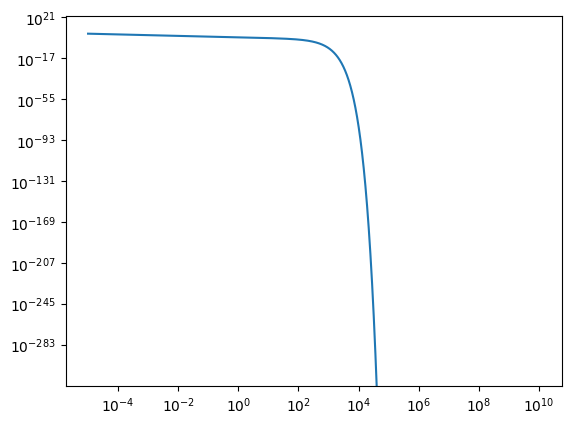

In [231]:
#PLOT
Egam_plot = Egam[1:]
plt.loglog(Egam_plot,L_plot)
#plt.ylim(1e-14)

**Caso Analítico:** $\alpha = 7/3$, $N(E) = E^{-\alpha}$


In [202]:
e = 4.8032e-10  #carga do elétron
m = 9.1094e-28 #massa do elétron
h = 6.6261e-27  #constante de planck
c = 2.9979e10  #velocidade de luz
B = 1e-3

In [252]:
Egamma = grid(1e-5,1e10,10000) #eV
#Egamma = 1000

In [253]:
Egamma

array([1.00000000e-05, 1.00345985e-05, 1.00693167e-05, ...,
       9.93116048e+09, 9.96552080e+09, 1.00000000e+10], shape=(10001,))

In [254]:
#Egamma = 1000
Egamma_erg = Egamma * ev_erg
E = grid(1.e-3,1.e12,100)
E_erg = E * ev_erg
Emax = E_erg[-1]
Emin = E_erg[0]

In [255]:
a = 1.85 * np.sqrt(2) * e**3 * B/(h * m * c**2)
rho = 3/(4 * np.pi) * np.sqrt(2/3) * e * h/(m * c) * B/((m * c**2)**2)
sigma = Egamma_erg/rho
Lgam = a/(2 * sigma**(2/3)) * (np.exp(-sigma/Emax**2) - np.exp(-sigma/Emin**2))



In [256]:
Lgam

array([440743.81201435, 439730.12909555, 438718.77758245, ...,
            0.        ,      0.        ,      0.        ], shape=(10001,))

In [268]:
Lgam_plot = Lgam[1:]


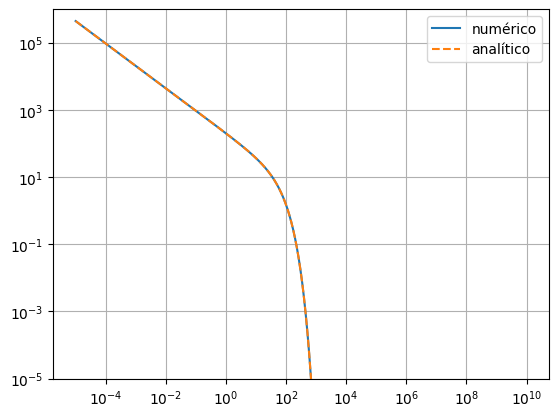

In [272]:
plt.loglog(Egam_plot,L_plot,label= 'numérico')
plt.loglog(Egam_plot,Lgam_plot, linestyle = '--',label = 'analítico')
plt.legend()
plt.grid()
plt.ylim(1e-5,1e6)
#plt.xlim(1e-11,1e3)
plt.show()

**Testando para Egamma = 1000 eV**

In [240]:
Energiagamma = np.zeros(1)

Energiagamma[0] = 1000

Energiagamma_erg = Energiagamma * ev_erg
Energia = grid(1.e-3,1.e12,100)
Energia_erg = Energia * ev_erg
Energiamax = Energia_erg[-1]
Energiamin = Energia_erg[0]

In [241]:
Energiagamma_erg

array([1.6e-09])

In [242]:
a = 1.85 * np.sqrt(2) * e**3 * B/(h * m * c**2)
rho = 3/(4 * np.pi) * np.sqrt(2/3) * e * h/(m * c) * B/((m * c**2)**2)
sigma = Energiagamma_erg/rho
Lgam = a/(2 * sigma**(2/3)) * (np.exp(-sigma/Energiamax**2) - np.exp(-sigma/Energiamin**2))

In [243]:
Lgam

array([2.00493009e-08])

In [244]:
L = SynchEm(particles,Energia_erg,Energiagamma_erg,B)

In [245]:
L

array([2.00493009e-08])

In [246]:
L/Lgam

array([1.])

-------------------------------------------------------------------------------------------------------------------------------------------

$\alpha, \beta = 2.$

In [290]:
particles = ExpCutOffPL(1.,2.,2.,1e15*ev_erg)
#criando grid the energia
ev_erg = 1.6*10**(-12) #erg
E = grid(1e3,1.e18,1000)
Egam = grid(1.e3,1e10,1000) #eV
#eV
E_erg = E*ev_erg
Egam_erg = Egam*ev_erg
B = 1e-3
#calculando emissão
L = SynchEm(particles,E_erg,Egam_erg,B)

/home/gabriel/Área de Trabalho/MsC-protoplanetary nebula/Modelo/SynchModel/synchmodel/integrate.py:32: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  resultado, erro = quad(function, lim_inf, lim_sup,**kwargs)
/home/gabriel/Área de Trabalho/MsC-protoplanetary nebula/Modelo/SynchModel/synchmodel/integrate.py:32: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  resultado, erro = quad(function, lim_inf, lim_sup,**kwargs)


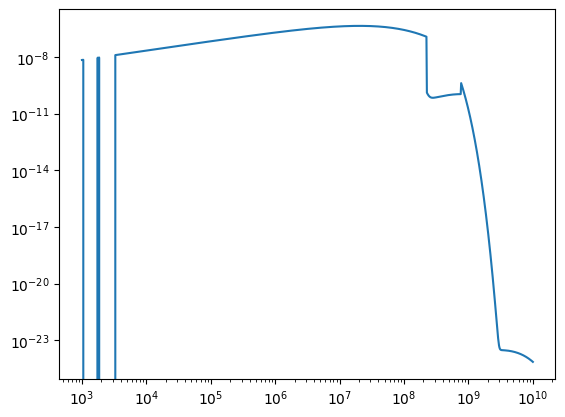

In [291]:
Lum = Egam_erg*L
Lum_plot = Lum[1:]
Egam_plot = Egam[1:]
plt.loglog(Egam,Lum)